# Project 4: Hacking Nutrition (Team Holbrook)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-4:-Hacking-Nutrition-(Team-Holbrook)" data-toc-modified-id="Project-4:-Hacking-Nutrition-(Team-Holbrook)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 4: Hacking Nutrition (Team Holbrook)</a></span><ul class="toc-item"><li><span><a href="#Import-statements-and-set-up" data-toc-modified-id="Import-statements-and-set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import statements and set up</a></span></li><li><span><a href="#Pre-processing-and-formatting-survey-data" data-toc-modified-id="Pre-processing-and-formatting-survey-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pre-processing and formatting survey data</a></span></li><li><span><a href="#Dataset-exploration" data-toc-modified-id="Dataset-exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dataset exploration</a></span><ul class="toc-item"><li><span><a href="#List-out-all-variables" data-toc-modified-id="List-out-all-variables-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>List out all variables</a></span></li><li><span><a href="#Choose-categories-for-expenditure-goods-and-household-characteristics." data-toc-modified-id="Choose-categories-for-expenditure-goods-and-household-characteristics.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Choose categories for expenditure goods and household characteristics.</a></span></li></ul></li><li><span><a href="#Basic-analysis-of-spend" data-toc-modified-id="Basic-analysis-of-spend-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Basic analysis of spend</a></span><ul class="toc-item"><li><span><a href="#Comparing-spending-by-category-across-food-stamp-groups" data-toc-modified-id="Comparing-spending-by-category-across-food-stamp-groups-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Comparing spending by category across food stamp groups</a></span></li></ul></li></ul></li><li><span><a href="#Estimating-demand-for-CA-residents" data-toc-modified-id="Estimating-demand-for-CA-residents-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimating demand for CA residents</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-variables" data-toc-modified-id="Loading-variables-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Loading variables</a></span></li></ul></li><li><span><a href="#Run-Result(),-get-reduced-form,-and-get-betas" data-toc-modified-id="Run-Result(),-get-reduced-form,-and-get-betas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Run Result(), get reduced form, and get betas</a></span><ul class="toc-item"><li><span><a href="#Sanity-check-on-estimation-accuracy" data-toc-modified-id="Sanity-check-on-estimation-accuracy-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Sanity check on estimation accuracy</a></span></li><li><span><a href="#Sanity-check-on-engels'-curve" data-toc-modified-id="Sanity-check-on-engels'-curve-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Sanity check on engels' curve</a></span></li><li><span><a href="#Calculates-alphas-and-betas" data-toc-modified-id="Calculates-alphas-and-betas-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Calculates alphas and betas</a></span></li></ul></li><li><span><a href="#Estimate-demand-system-for-CA-residents" data-toc-modified-id="Estimate-demand-system-for-CA-residents-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Estimate demand system for CA residents</a></span><ul class="toc-item"><li><span><a href="#Get-prices" data-toc-modified-id="Get-prices-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Get prices</a></span></li><li><span><a href="#Calculate-quantities-demanded" data-toc-modified-id="Calculate-quantities-demanded-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Calculate quantities demanded</a></span></li></ul></li></ul></li><li><span><a href="#Indifference-Curves-for-various-food-groups" data-toc-modified-id="Indifference-Curves-for-various-food-groups-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Indifference Curves for various food groups</a></span><ul class="toc-item"><li><span><a href="#Considering-nutritional-information" data-toc-modified-id="Considering-nutritional-information-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Considering nutritional information</a></span><ul class="toc-item"><li><span><a href="#Plot-nutritional-outcomes" data-toc-modified-id="Plot-nutritional-outcomes-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Plot nutritional outcomes</a></span></li></ul></li><li><span><a href="#Policy-estimations" data-toc-modified-id="Policy-estimations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Policy estimations</a></span></li></ul></li></ul></div>

## Import statements and set up

In [1]:
!pip install CFEDemands --upgrade
!pip install xarray

Requirement already up-to-date: CFEDemands in /Users/sannidhi/anaconda3/lib/python3.7/site-packages (0.1.6.6)
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import cfe
import pandas as pd
import numpy as np
import random
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

## Pre-processing and formatting survey data

In [3]:
data_no_food_stamps = pd.read_csv('../data/actual/no_food_stamps.csv')
data_yes_food_stamps = pd.read_csv('../data/actual/yes_food_stamps.csv')

columns_to_drop = ['Unnamed: 0', 'id', 'id_2', 
                   'supp_security', 'schoolmeals_purchases', 
                   'self_employed', 'FWAGEXM',
                   'members_under18', 'members_over64',
                    'food_away', 'food_home', 'avg(GROSPAYX)']

def standard_format(dataset):
    
    dataset['j'] = dataset['id']
    dataset['t'] = 17
    dataset['m'] = 1
    
    
    dataset['M'] = ""
    dataset['F'] = ""
    dataset.loc[dataset['sex'] == 'Male', 'M'] = 1
    dataset.loc[dataset['M'] == '', 'M'] = 0
    dataset.loc[dataset['sex'] == 'Female', 'F'] = 1
    dataset.loc[dataset['F'] == '', 'F'] = 0
    
    dataset['log_fsize'] = np.log(dataset['fam_size'])
    
    dataset.set_index(['j', 't', 'm'], inplace = True)
    dataset.drop(columns = columns_to_drop, inplace = True)

cali_no = data_no_food_stamps[data_no_food_stamps['state'].str.contains('Cali', na = False)]
cali_yes = data_yes_food_stamps[data_yes_food_stamps['state'].str.contains('Cali', na = False)]

datasets = {'California residents (no FS)': cali_no,
           'California residents (yes FS)': cali_yes,
           'US residents (no FS)': data_no_food_stamps,
           'US residents (yes FS)': data_yes_food_stamps}

for key, value in datasets.items():
    standard_format(value)

In [4]:
P_yes = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_Pbtl-M-jP17QyYQzwsy5hzJNC1RS2ol_JmH11G6Omw3MX6SesnK3_6puwsWQUHFsKCVhPFCwhExE/pub?gid=1990185084&single=true&output=csv')
P_yes.set_index(['i'], inplace = True)
P_yes.head()
test = xr.DataArray(P_yes['prices'])
test

<xarray.DataArray 'prices' (i: 18)>
array([9.937705, 7.906218, 5.851106, 4.092479, 1.07523 , 8.107099, 6.532807,
       3.284924, 4.48    , 2.429568, 5.214702, 2.803513, 3.975505, 8.39843 ,
       3.149823, 2.028527, 2.594154, 3.492714])
Coordinates:
  * i        (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'

## Dataset exploration 

In [5]:
pop_describers = ['age', 'fam_size', 'net_income', 'total_food', 'total_food_percent', 'number_foodstamps']

In [6]:
cali_no[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,485.000000,485.00000,485.000000,485.000000,485.000000,0.0
mean,51.476289,2.56701,94651.287629,168.057934,0.149956,NaN


In [7]:
cali_yes[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,39.000000,39.000000,39.000000,39.00000,39.000000,38.0
mean,45.564103,3.589744,41576.887179,128.57101,0.198993,10.0


In [8]:
data_no_food_stamps[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,4884.000000,4884.00000,4884.000000,4884.000000,4884.000000,0.0
mean,52.480344,2.42199,87416.968591,149.098386,0.135048,NaN


In [9]:
data_yes_food_stamps[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,491.000000,491.000000,491.000000,491.000000,491.000000,484.00
mean,48.790224,3.167006,33749.366395,107.321433,0.230127,10.25


### List out all variables

In [10]:
cali_no.columns

Index(['age', 'highest_education', 'profession', 'hispanic',
       'weekly_hours_worked', 'in_college', 'is_married', 'sex',
       'reason_unemployment', 'main_profession', 'numweeks_schoolmeals', 'psu',
       'psu_popsize', 'net_income', 'alcbev', 'bakery', 'beef', 'cereal',
       'child_age', 'housing_type', 'census_division', 'eggs', 'fam_size',
       'total_food', 'fresh_fruit', 'fresh_veg', 'value_foodstamps',
       'number_foodstamps', 'non_alc_grocery', 'milk', 'number_earners',
       'non_alc_bevs', 'oils', 'othdairy', 'othmeat', 'pet_food', 'pork',
       'procfruit', 'proc_veg', 'spouse_race', 'foodstamp_or_not', 'seafood',
       'smoking', 'lives_in_MSA', 'state', 'sweets', 'vehicle',
       'miscellaneous', 'poultry', 'total_food_percent', 'M', 'F',
       'log_fsize'],
      dtype='object')

### Choose categories for expenditure goods and household characteristics.

In [11]:
expenditures = ['alcbev', 'bakery', 'beef', 'cereal', 'eggs',
                'fresh_fruit', 'fresh_veg', 'milk', 'non_alc_bevs',
                'oils', 'othdairy', 'othmeat', 'poultry', 'pork', 'procfruit',
                'proc_veg', 'seafood', 'sweets']

household_chars = ['age', 'M', 'log_fsize', 'vehicle', 'child_age']

## Basic analysis of spend

In [12]:
for key, value in datasets.items():
    print(key, 'has', value.shape[0], 'entries.')

California residents (no FS) has 485 entries.
California residents (yes FS) has 39 entries.
US residents (no FS) has 4884 entries.
US residents (yes FS) has 491 entries.


### Comparing spending by category across food stamp groups

,mean,ratio
alcbev,15.778444,0.173792
bakery,7.753568,0.085402
beef,5.419872,0.059697
cereal,3.725519,0.041035
eggs,1.406550,0.015492
fresh_fruit,7.978605,0.087880
fresh_veg,7.051676,0.077671
milk,3.200180,0.035248
non_alc_bevs,8.133430,0.089586
oils,2.293581,0.025263


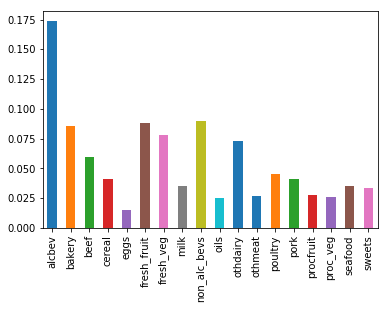

In [13]:
means_no = cali_no[expenditures].describe()
means_no = means_no.loc['mean'].to_frame()
means_no['ratio'] = means_no['mean']/sum(means_no['mean'])

x1 = means_no['ratio'].plot.bar()

means_no

,mean,ratio
alcbev,4.842387,0.056493
bakery,7.906218,0.092236
beef,5.851106,0.068261
cereal,4.092479,0.047744
eggs,1.075230,0.012544
fresh_fruit,8.107099,0.094580
fresh_veg,6.532807,0.076214
milk,3.284924,0.038323
non_alc_bevs,9.937705,0.115936
oils,2.429568,0.028344


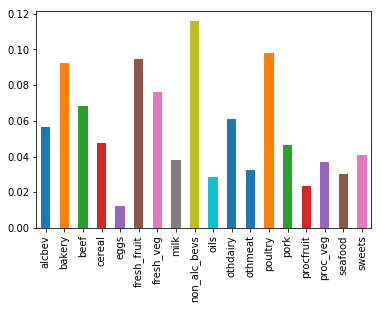

In [14]:
means_yes = cali_yes[expenditures].describe()
means_yes = means_yes.loc['mean'].to_frame()
means_yes['ratio'] = means_yes['mean']/sum(means_yes['mean'])
means_yes['ratio'].plot.bar()
means_yes

# Estimating demand for CA residents

### Loading variables

In [15]:
X_yes = cali_yes[expenditures]
Z_yes = cali_yes[household_chars]
Y_yes = np.log(X_yes.replace(0,np.nan))
P = test

Z_yes.head()

,,,age,M,log_fsize,vehicle,child_age
j,t,m,,,,,
361586,17,1,49,0,0.693147,1.0,5
361731,17,1,70,1,0.693147,2.0,0
362307,17,1,44,0,1.386294,1.0,4
362323,17,1,45,0,1.098612,NaN,0
362559,17,1,30,0,1.386294,2.0,2


In [16]:
Y_yes.head()

,,,alcbev,bakery,beef,cereal,eggs,fresh_fruit,fresh_veg,milk,non_alc_bevs,oils,othdairy,othmeat,poultry,pork,procfruit,proc_veg,seafood,sweets
j,t,m,,,,,,,,,,,,,,,,,,
361586,17,1,-0.216913,2.283028,1.490654,0.965081,0.737164,0.890329,1.510025,2.004269,2.021548,1.190888,2.317986,NaN,NaN,1.606433,1.339585,0.430184,NaN,1.755268
361731,17,1,2.387845,1.820509,2.560323,0.476234,NaN,2.458734,-0.127833,NaN,NaN,0.685619,1.920592,0.398776,1.772407,1.027832,NaN,1.519513,1.262713,2.035359
362307,17,1,NaN,2.788093,1.554982,1.905832,NaN,NaN,0.239017,0.806476,3.307985,1.789256,2.299581,0.690644,NaN,NaN,NaN,1.095273,NaN,2.419034
362323,17,1,NaN,2.375836,NaN,1.247032,0.371564,-0.703198,-0.703198,NaN,1.747459,0.559616,NaN,NaN,2.909084,1.381282,0.552303,1.075941,1.928619,NaN
362559,17,1,NaN,NaN,2.751120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.467839,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
P

<xarray.DataArray 'prices' (i: 18)>
array([9.937705, 7.906218, 5.851106, 4.092479, 1.07523 , 8.107099, 6.532807,
       3.284924, 4.48    , 2.429568, 5.214702, 2.803513, 3.975505, 8.39843 ,
       3.149823, 2.028527, 2.594154, 3.492714])
Coordinates:
  * i        (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'

## Run Result(), get reduced form, and get betas

### Sanity check on estimation accuracy

In [18]:
result = cfe.Result(y = Y_no, z = Z_no, prices = P)
result.get_reduced_form()
result.delta.to_dataframe().unstack('k')
result.a.to_dataframe().unstack('i')
result.get_beta().to_dataframe()

NameError: name 'Y_no' is not defined

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

result.get_predicted_log_expenditures()

x = result.y.sum('i').to_dataframe().squeeze()
xhat = result.yhat.sum('i').to_dataframe().squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':x,'Predicted':xhat})

df.plot.scatter(x='Predicted',y='Actual')

### Sanity check on engels' curve

In [ ]:
import pylab as pl 

# Turn off variation in household composition
result['z'] = result['z']*0

# select years and markets you want
l0 = result.loglambdas.sel(t=17,m=1)

# Predicted total expenditures given lambda & prices
x0 = result.get_predicted_expenditures().sum('i').sel(t=17,m=1)

pl.scatter(x0,l0)
pl.show()

### Calculates alphas and betas

In [ ]:
result.get_alpha(as_df=True), result.get_beta(as_df=True)

In [ ]:
result.delta.to_dataframe().unstack('k')

## Estimate demand system for CA residents 



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, from 1975, and focus on
village A as the market we&rsquo;re interested in



In [ ]:
result

### Get prices 

In [ ]:
p = result.prices.copy()

p.to_dataframe().squeeze()

### Calculate quantities demanded

In [ ]:
x = 50 # Budget

def get_demand(x, p):
    demand = result_no.demands(x,p) 
    demand = demand.to_frame()
    demand.index.rename('food_group', inplace = True)
    return demand

get_demand(x, p)

# Indifference Curves for various food groups

In [ ]:
def plot_curve(group):
    def my_prices_beef(p0,p=p):
        p.loc[group] = p0
        return p

    for x in [10,20,40,80,160]:
        try:
            plt.plot([result_no.demands(x,my_prices(p0))[group] for p0 in P],P)
        except OverflowError:
            break

    plt.xlabel(group)
    plt.ylabel('Price')

In [ ]:
plot_curve('cereal')

In [ ]:
plot_curve('eggs')

In [ ]:
plot_curve('non_alc_bevs')

## Considering nutritional information

In [ ]:
fct = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_Pbtl-M-jP17QyYQzwsy5hzJNC1RS2ol_JmH11G6Omw3MX6SesnK3_6puwsWQUHFsKCVhPFCwhExE/pub?gid=499724967&single=true&output=csv')
fct.rename(index = str, columns= {'Unnamed: 0': 'Nutrient'}, inplace = True)
fct.set_index('Nutrient', drop = True, inplace = True)
fct.shape

In [ ]:
fct.head()

### Plot nutritional outcomes

In [ ]:
# The @ operator means matrix multiply

important = ['Sodium, Na', 'Energy', 'Cholesterol', 'Sugars, total', 'Protein', 'Iron, Fe', 'Vitamin D (D2 + D3)']
imp_values = pd.DataFrame()

N = fct0.T@c0
for n in important:
    imp_values = imp_values.append(N.loc[n])

imp_values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(1,20,50)

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[important] for x in X},axis=1).T)
plt.legend(important)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

In [ ]:
cfe.Result?